## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import r2_score

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x = np.linspace(0, 20,50)
y = -2 * x + 1

In [3]:
print(x)
print(y)
print(x.size)

[ 0.          0.40816327  0.81632653  1.2244898   1.63265306  2.04081633
  2.44897959  2.85714286  3.26530612  3.67346939  4.08163265  4.48979592
  4.89795918  5.30612245  5.71428571  6.12244898  6.53061224  6.93877551
  7.34693878  7.75510204  8.16326531  8.57142857  8.97959184  9.3877551
  9.79591837 10.20408163 10.6122449  11.02040816 11.42857143 11.83673469
 12.24489796 12.65306122 13.06122449 13.46938776 13.87755102 14.28571429
 14.69387755 15.10204082 15.51020408 15.91836735 16.32653061 16.73469388
 17.14285714 17.55102041 17.95918367 18.36734694 18.7755102  19.18367347
 19.59183673 20.        ]
[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.6734

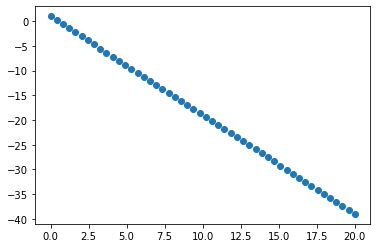

In [4]:
plt.scatter(x,y)

#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [37]:
def gradient_descent(x,y,learning_rate,max_iter):
        final_thetas = []
        cost_func = [];
        theta0_val = [];
        theta1_val = [];
        hypothesis_output = [];
        theta_0 = 0
        theta_1 = 0
        i=1
        while i <= max_iter :
            #step 2
            output_hx = theta_0 + theta_1 * x
            hypothesis_output.append(output_hx)
            #step 3
            j_theta = 0
            j_theta = (1/(2*output_hx.size))*((output_hx - y)**2).sum()
            cost_func.append(j_theta)
            theta0_val.append(theta_0)
            theta1_val.append(theta_1)
            #step 4
            #theta 0 gradient
            theta_0_gradient = 0
            theta_0_gradient = (1/(output_hx.size)) * (output_hx - y).sum()
            #theta 1 gradient
            theta_1_gradient = 0
            theta_1_gradient = (1/(output_hx.size)) * ( (output_hx - y) * x ).sum()
            #step 5
            #next theta 0 => update
            last_theta_0 = theta_0
            next_theta_0 = theta_0 - learning_rate * theta_0_gradient
            theta_0 = next_theta_0
            #next theta 1 => update
            next_theta_1 = theta_1 - learning_rate * theta_1_gradient
            theta_1=next_theta_1
            if len(cost_func) ==1:
                cost_func_error = 2
            else:
                cost_func_error = abs(cost_func[-2]-cost_func[-1])
            if i == max_iter or cost_func_error<=0.001:#reached max iterations
                final_theta_0 = theta_0
                final_theta_1 = theta_1
                final_thetas.append(final_theta_0)
                final_thetas.append(final_theta_1)
                return final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output
            i+=1

In [38]:
a,b,c,d,e = gradient_descent(x,y,0.001,50)
print("No of iterations: " , len(b))

No of iterations:  41


In [39]:
print(r2_score(y, e[-1]))

0.9975950054190024


#### Try your function with any input parameterss of your choice.

In [40]:
final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = gradient_descent(x,y,0.001,50)

#### Calculate r2 score

In [41]:
print(r2_score(y, hypothesis_output[-1]))

0.9975950054190024


#### Plot loss vs. epochs

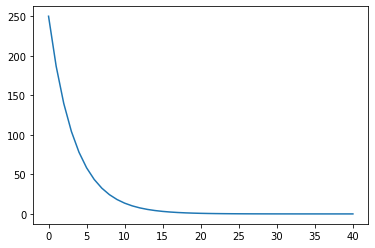

In [42]:
plt.plot(cost_func)

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

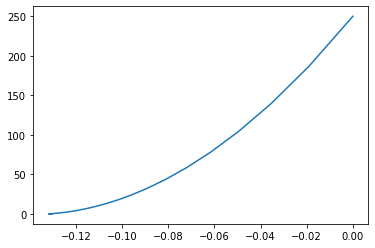

In [43]:
plt.plot(theta0_val,cost_func);

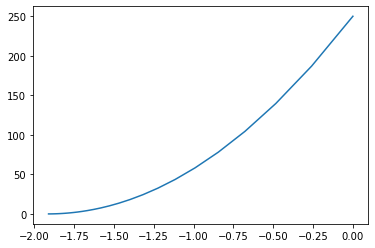

In [44]:
plt.plot(theta1_val,cost_func);

#### Plot all regression lines till converge

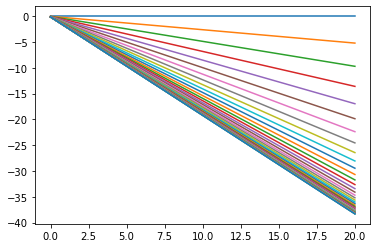

In [45]:
for i in range(len(theta0_val)):
    plt.plot(x,hypothesis_output[i])

#### Plot the best regression line

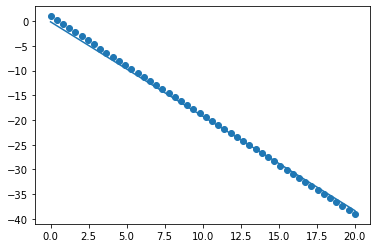

In [46]:
plt.scatter(x,y)
plt.plot(x,hypothesis_output[-1])

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [80]:
final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = gradient_descent(x,y,0.005,50)
print("No of iteraions: " , len(cost_func))

No of iteraions:  8


In [81]:
print(r2_score(y, hypothesis_output[-1]))

0.9976200723230484


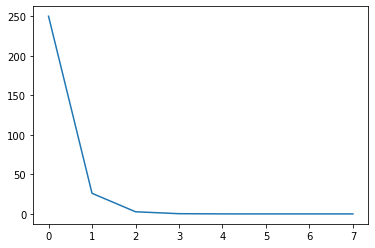

In [82]:
plt.plot(cost_func)

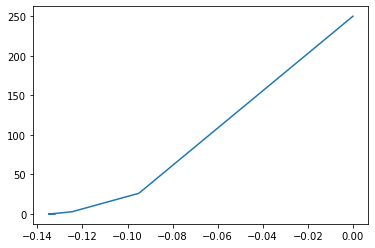

In [83]:
plt.plot(theta0_val,cost_func);

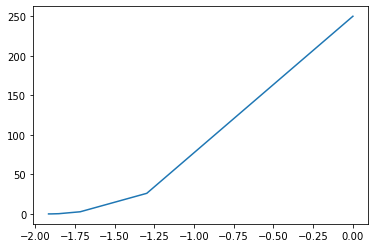

In [84]:
plt.plot(theta1_val,cost_func);

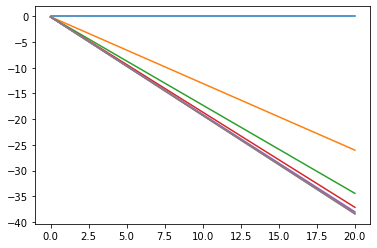

In [85]:
for i in range(len(theta0_val)):
    plt.plot(x,hypothesis_output[i])

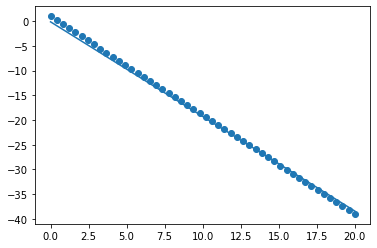

In [86]:
plt.scatter(x,y)
plt.plot(x,hypothesis_output[-1])

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [87]:
def Mini_Batches(x,y,no_batches):
    #function returns two list of list for x , y batches
    batch_size = int(len(x) / no_batches)
    x_mini_batches = []
    y_mini_batches = []
    for i in range(no_batches):
        if i == no_batches-1:
            x_mini_batches.append(x[i*batch_size:len(x)-1])
            y_mini_batches.append(y[i*batch_size:len(y)-1])
            break
        x_mini_batches.append(x[i*batch_size:(i+1)*batch_size])
        y_mini_batches.append(y[i*batch_size:(i+1)*batch_size])
    return x_mini_batches,y_mini_batches

x_mini_batches,y_mini_batches = Mini_Batches(x,y,4)
print(len(x_mini_batches[0]))
print(len(y_mini_batches[0]))
print(type(np.array(x_mini_batches[0])))

12
12
<class 'numpy.ndarray'>


In [91]:
#mini-batch Gradient Descent
def Mini_Batch_GD(x,y,learning_rate,max_iteration,no_batches):
    x_mini_batches,y_mini_batches = Mini_Batches(x,y,no_batches)
    final_thetas_b = []
    cost_func_b = [];
    theta0_val_b = [];
    theta1_val_b = [];
    hypothesis_output_b = [];
    def gradient_descent_for_batch(x,y,learning_rate,max_iter,theta_0,theta_1):
        i=1
        while i <= max_iter :
            #step 2
            output_hx = theta_0 + theta_1 * x
            hypothesis_output_b.append(output_hx)
            #step 3
            j_theta = 0
            j_theta = (1/(2*output_hx.size))*((output_hx - y)**2).sum()
            cost_func_b.append(j_theta)
            theta0_val_b.append(theta_0)
            theta1_val_b.append(theta_1)
            #step 4
            #theta 0 gradient
            theta_0_gradient = 0
            theta_0_gradient = (1/(output_hx.size)) * (output_hx - y).sum()
            #theta 1 gradient
            theta_1_gradient = 0
            theta_1_gradient = (1/(output_hx.size)) * ( (output_hx - y) * x ).sum()
            #step 5
            #next theta 0 => update
            last_theta_0 = theta_0
            next_theta_0 = theta_0 - learning_rate * theta_0_gradient
            theta_0 = next_theta_0
            #next theta 1 => update
            next_theta_1 = theta_1 - learning_rate * theta_1_gradient
            theta_1=next_theta_1
            if len(cost_func_b) ==1:
                cost_func_error = 2
            else:
                cost_func_error = abs(cost_func_b[-2]-cost_func_b[-1])
            if i == max_iter or cost_func_error<=0.001:#reached max iterations
                final_theta_0 = theta_0
                final_theta_1 = theta_1
                final_thetas_b.append(final_theta_0)
                final_thetas_b.append(final_theta_1)
                return final_thetas_b,cost_func_b,theta0_val_b,theta1_val_b,hypothesis_output_b
            i+=1
            
    for i in range(no_batches):
        if i==0:
            theta_0 = 0
            theta_1 = 0
            final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = gradient_descent_for_batch\
                 (np.array(x_mini_batches[i]),np.array(y_mini_batches[i]),learning_rate,max_iteration,theta_0,theta_1)
        else:
            theta_0 = final_thetas[-2]
            theta_1 = final_thetas[-1]
            final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = gradient_descent_for_batch\
                 (np.array(x_mini_batches[i]),np.array(y_mini_batches[i]),learning_rate,max_iteration,theta_0,theta_1)
    #print R2score and plot
    print(r2_score(y, final_thetas[-2]+final_thetas[-1]*x  ))
    print(len(theta0_val));
    plt.plot(cost_func)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.show()
    
    plt.plot(theta0_val,cost_func)
    plt.xlabel("Theta Zero")
    plt.ylabel("Cost")
    plt.show()
    plt.plot(theta1_val,cost_func)
    plt.xlabel("Theta One") 
    plt.ylabel("Cost")
    plt.show()
    plt.scatter(x,y)
    plt.plot(x,final_thetas[-2]+final_thetas[-1]*x)
    plt.show()
    #return(final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output)

0.9965921686916968
695


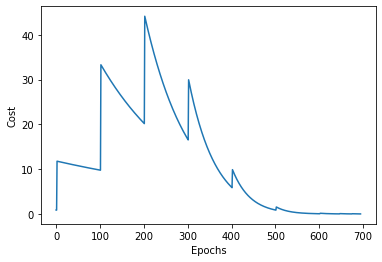

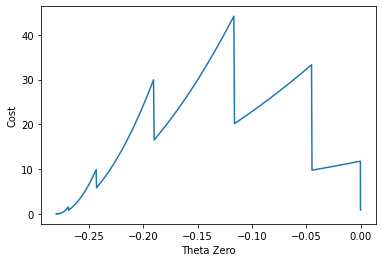

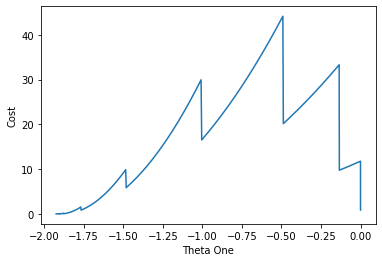

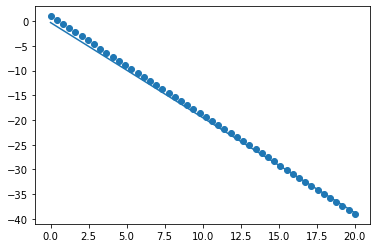

In [104]:
Mini_Batch_GD(x,y,0.0001,100,10)

0.9970197915624696
467


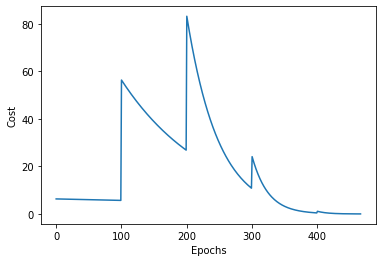

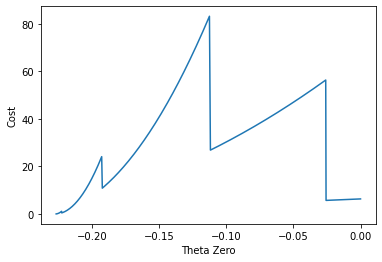

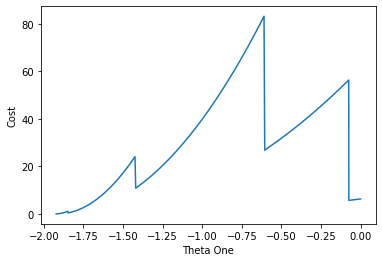

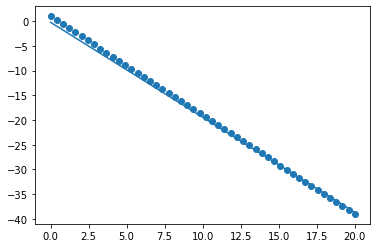

In [105]:
Mini_Batch_GD(x,y,0.0001,100,5)

0.9252479753951139
150


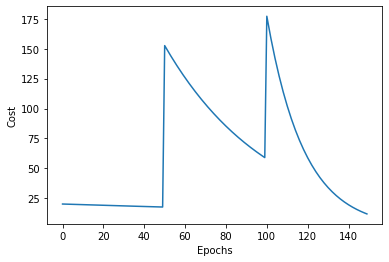

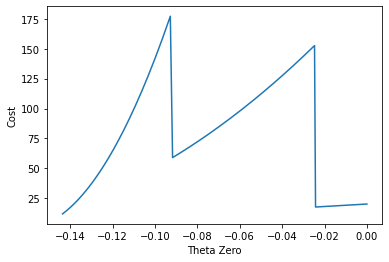

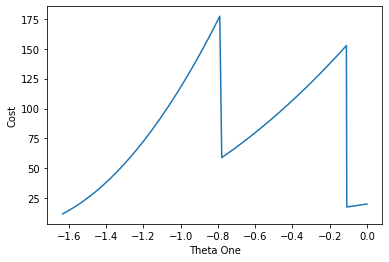

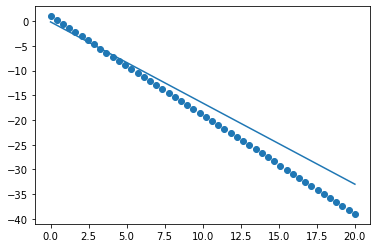

In [114]:
Mini_Batch_GD(x,y,0.0001,50,3)

0.9960362102496993
211


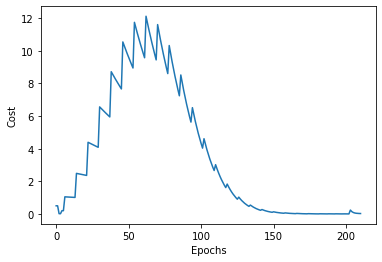

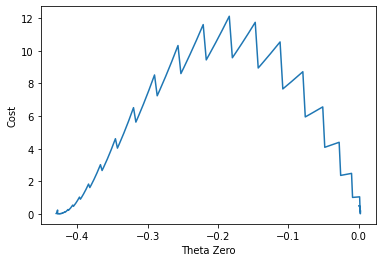

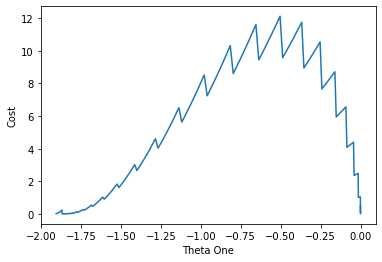

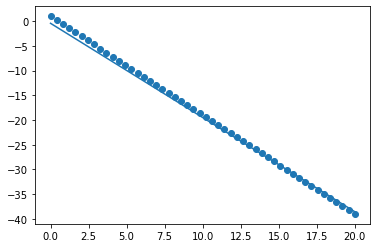

In [115]:
Mini_Batch_GD(x,y,0.001,8,30)

0.997037090026914
548


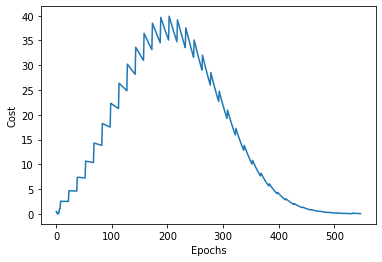

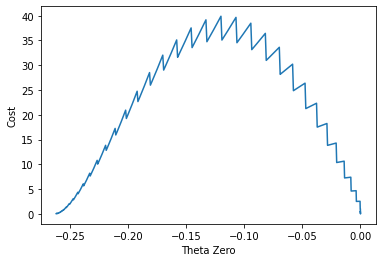

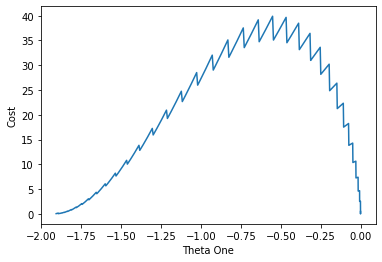

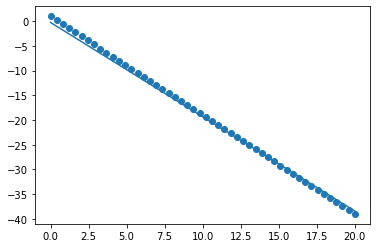

In [124]:
Mini_Batch_GD(x,y,0.0001,15,40)

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [146]:
#Stochastic Gradient Descent
def Stochastic_GD(x,y,learning_rate,max_iteration):
    final_thetas_b = []
    cost_func_b = [];
    theta0_val_b = [];
    theta1_val_b = [];
    hypothesis_output_b = [];
    def gradient_descent_for_stochastic(x,y,learning_rate,max_iter,theta_0,theta_1):
        i=1
        while i <= max_iter :
            #step 2
            output_hx = theta_0 + theta_1 * x
            hypothesis_output_b.append(output_hx)
            #step 3
            j_theta = 0
            j_theta = (1/(2*output_hx.size))*((output_hx - y)**2).sum()
            cost_func_b.append(j_theta)
            theta0_val_b.append(theta_0)
            theta1_val_b.append(theta_1)
            #step 4
            #theta 0 gradient
            theta_0_gradient = 0
            theta_0_gradient = (1/(output_hx.size)) * (output_hx - y).sum()
            #theta 1 gradient
            theta_1_gradient = 0
            theta_1_gradient = (1/(output_hx.size)) * ( (output_hx - y) * x ).sum()
            #step 5
            #next theta 0 => update
            last_theta_0 = theta_0
            next_theta_0 = theta_0 - learning_rate * theta_0_gradient
            theta_0 = next_theta_0
            #next theta 1 => update
            next_theta_1 = theta_1 - learning_rate * theta_1_gradient
            theta_1=next_theta_1
            if len(cost_func_b) ==1:
                cost_func_error = 2
            else:
                cost_func_error = abs(cost_func_b[-2]-cost_func_b[-1])
            if i == max_iter or cost_func_error<=0.001:#reached max iterations
                final_theta_0 = theta_0
                final_theta_1 = theta_1
                final_thetas_b.append(final_theta_0)
                final_thetas_b.append(final_theta_1)
                return final_thetas_b,cost_func_b,theta0_val_b,theta1_val_b,hypothesis_output_b
            i+=1
            
    for i in range(len(x)):
        if i==0:
            theta_0 = 0
            theta_1 = 0
            final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = gradient_descent_for_stochastic\
                                (np.array(x[i]),np.array(y[i]),learning_rate,max_iteration,theta_0,theta_1)
        else:
            theta_0 = final_thetas[-2]
            theta_1 = final_thetas[-1]
            final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output = gradient_descent_for_stochastic\
                                (np.array(x[i]),np.array(y[i]),learning_rate,max_iteration,theta_0,theta_1)
    #print R2score and plot
    print("r2 score: " , r2_score(y, final_thetas[-2]+final_thetas[-1]*x  ))
    print("iteraions: " , len(theta0_val));
    plt.plot(cost_func)
    plt.xlabel("Epochs")
    plt.ylabel("Cost")
    plt.show()
    
    plt.plot(theta0_val,cost_func)
    plt.xlabel("Theta Zero")
    plt.ylabel("Cost")
    plt.show()
    plt.plot(theta1_val,cost_func)
    plt.xlabel("Theta One") 
    plt.ylabel("Cost")
    plt.show()
    plt.scatter(x,y)
    plt.plot(x,final_thetas[-2]+final_thetas[-1]*x)
    plt.show()
    #return(final_thetas,cost_func,theta0_val,theta1_val,hypothesis_output)

r2 score:  0.9972454126180775
iteraions:  284


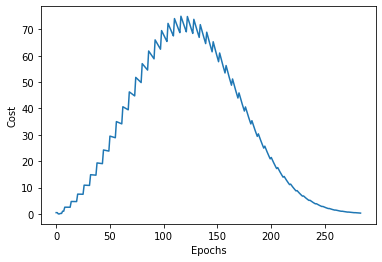

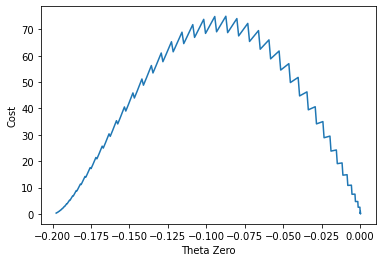

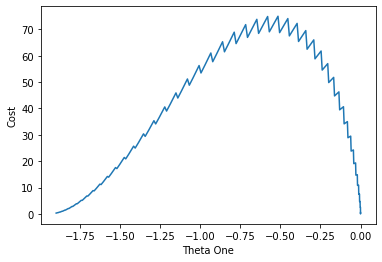

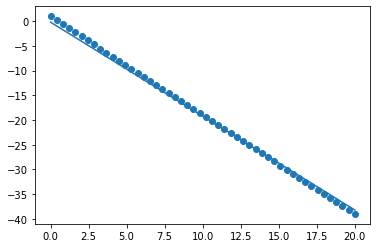

In [156]:
Stochastic_GD(x,y,0.0001,6)

r2 score:  0.994334062789542
iteraions:  445


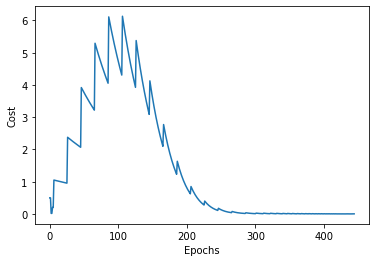

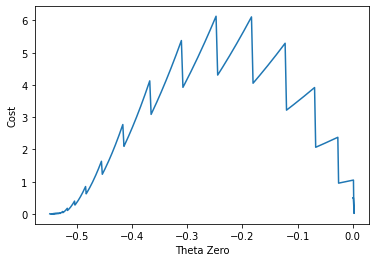

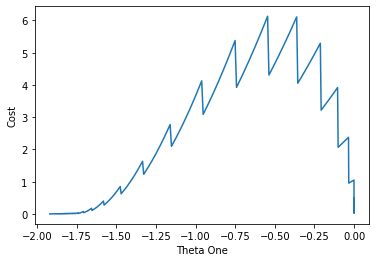

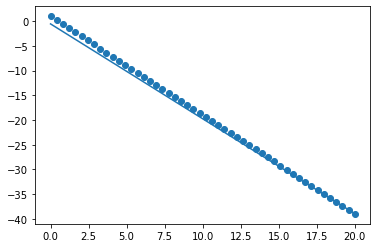

In [159]:
Stochastic_GD(x,y,0.001,20)

r2 score:  0.9964730927232207
iteraions:  50


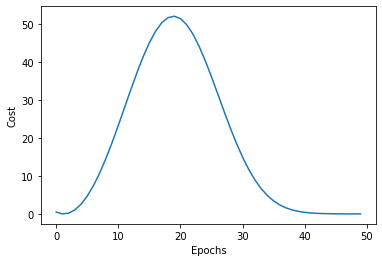

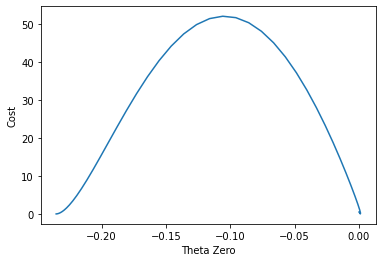

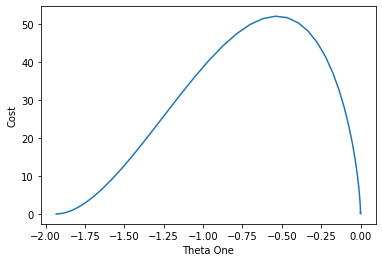

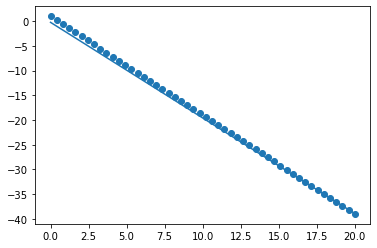

In [161]:
Stochastic_GD(x,y,0.001,1)